#**EXPLORATORY DATA ANALYSIS**

### **Importing Library and Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning/Project/Bike_Sharing/Dataset/hour.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning/Project/Bike_Sharing/Dataset/day.csv')

In [4]:
df.info()

# from this function we can see that there is no null value in each features/column
# so we can go to the next step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# we try to prevent something happened to the real dataset
# for that reason we duplicate the dataset and label it with 'bike'

# we rename the columns into something that is easy to read
# and we replace several values from numeric (like weekday, season, weather_condition, month) into categorical
# these changes is for simplify when we create the graph


# from what we research, the dataset of column temp, atemp, windspeed, and humidity has been normalized
# we reverse those into real scale so that the EDA will show the actual values of each column

bike = df.copy()
bike.drop(columns=['instant'],axis=1,inplace=True)
bike.rename(columns={'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'cnt':'count',
                        'mnth':'month',
                        'yr':'year'
                     },inplace=True)
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['year'] = bike['dteday'].dt.year
bike['month'] = bike['dteday'].dt.month
bike['day'] = bike['dteday'].dt.day
bike['temp'] = bike['temp']*41
bike['atemp'] = bike['atemp']*50
bike['windspeed'] = bike['windspeed']*67
bike['humidity'] = bike['humidity']*100
bike['weekday'] = bike['weekday'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'})
bike['weather_condition'] = bike['weather_condition'].map({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'})
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike['month'] = bike['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike['is_holiday'] = bike['is_holiday'].map({0:'No', 1:'Yes'})
bike['is_workingday'] = bike['is_workingday'].map({0:'Weekend', 1:'Workingday'})
bike

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01,Spring,2011,January,0,No,Saturday,Weekend,Clear,9.84,14.395,81.0,0.0000,3,13,16,1
1,2011-01-01,Spring,2011,January,1,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0000,8,32,40,1
2,2011-01-01,Spring,2011,January,2,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0000,5,27,32,1
3,2011-01-01,Spring,2011,January,3,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0000,3,10,13,1
4,2011-01-01,Spring,2011,January,4,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,No,Monday,Workingday,Cloudy,10.66,12.880,60.0,11.0014,11,108,119,31
17375,2012-12-31,Spring,2012,December,20,No,Monday,Workingday,Cloudy,10.66,12.880,60.0,11.0014,8,81,89,31
17376,2012-12-31,Spring,2012,December,21,No,Monday,Workingday,Clear,10.66,12.880,60.0,11.0014,7,83,90,31
17377,2012-12-31,Spring,2012,December,22,No,Monday,Workingday,Clear,10.66,13.635,56.0,8.9981,13,48,61,31


In [9]:
bike['date']= bike['dteday'].dt.day
bike

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day,date
0,2011-01-01,Spring,2011,January,0,No,Saturday,Weekend,Clear,9.84,14.395,81.0,0.0000,3,13,16,1,1
1,2011-01-01,Spring,2011,January,1,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0000,8,32,40,1,1
2,2011-01-01,Spring,2011,January,2,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0000,5,27,32,1,1
3,2011-01-01,Spring,2011,January,3,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0000,3,10,13,1,1
4,2011-01-01,Spring,2011,January,4,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,No,Monday,Workingday,Cloudy,10.66,12.880,60.0,11.0014,11,108,119,31,31
17375,2012-12-31,Spring,2012,December,20,No,Monday,Workingday,Cloudy,10.66,12.880,60.0,11.0014,8,81,89,31,31
17376,2012-12-31,Spring,2012,December,21,No,Monday,Workingday,Clear,10.66,12.880,60.0,11.0014,7,83,90,31,31
17377,2012-12-31,Spring,2012,December,22,No,Monday,Workingday,Clear,10.66,13.635,56.0,8.9981,13,48,61,31,31


## **PROBLEM STATEMENT**

After seeing the dataset, we set three questions:

**First**, we would like to see how the sales going on in 2011 and 2012. What pattern show up between 2011 and 2012. And what should we do with this given information?

**Second**, we would like to see if weather condition has effect on the sales in 2011 and 2012. Does heavy rain really stops you from renting our bike?

**Third**, we would like to see the behaviour of each user type. By using this behaviour, we hope that we can suggest a marketing campaign to increase the conversion rate.

### **SALES TREND FROM 2011 - 2012**

In [10]:
# before any further action, we decide to create an order for several columns. This might help when later on we are grouping values

# ordering month
order_mth = pd.CategoricalDtype(
    ['January','February','March','April','May','June', 'July', 'August', 'September','October','November','December'], 
    ordered=True)

#ordering weekday
order_weekday = pd.CategoricalDtype(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'], 
    ordered=True)

#ordering month on fall season
order_fall = pd.CategoricalDtype(
    ['June', 'July', 'August', 'September'], 
    ordered=True
)
#ordering season
order_season = pd.CategoricalDtype(
    ['Spring', 'Summer', 'Fall', 'Winter'], 
    ordered=True
)
#ordering weather condition
order_weather = pd.CategoricalDtype(
    ['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'], 
    ordered=True
)

In [11]:
bike_summary = pd.DataFrame(bike.groupby(['year']).sum()[['casual','registered','count']]).reset_index()
bike_summary

,year,casual,registered,count
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


In [12]:
# sum bike rented each month from 2011-2012
# sort by year and month

bike_sum_mth = pd.DataFrame(bike.groupby(['year','month']).sum()[['casual','registered','count']]).reset_index()
bike_sum_mth['month']=bike_sum_mth['month'].astype(order_mth)
bike_sum_mth = bike_sum_mth.sort_values(['year','month'])
bike_sum_mth

,year,month,casual,registered,count
4,2011,January,3073,35116,38189
3,2011,February,6242,41973,48215
7,2011,March,12826,51219,64045
0,2011,April,22346,72524,94870
8,2011,May,31050,104771,135821
6,2011,June,30612,112900,143512
5,2011,July,36452,104889,141341
1,2011,August,28842,107849,136691
11,2011,September,26545,100873,127418
10,2011,October,25222,98289,123511


In [13]:
# sum bike rented each season in 2011 and 2012 
# then sort by year and season

bike_season = pd.DataFrame(bike.groupby(['year','season']).sum()[['casual','registered','count']]).reset_index()
bike_season['season']=bike_season['season'].astype(order_season)
bike_season = bike_season.sort_values('year')
bike_season

,year,season,casual,registered,count
0,2011,Fall,95450,324200,419650
1,2011,Spring,21425,128575,150000
2,2011,Summer,77564,269752,347316
3,2011,Winter,52813,273324,326137
4,2012,Fall,130641,510838,641479
5,2012,Spring,39197,282151,321348
6,2012,Summer,125958,445315,571273
7,2012,Winter,76969,438507,515476


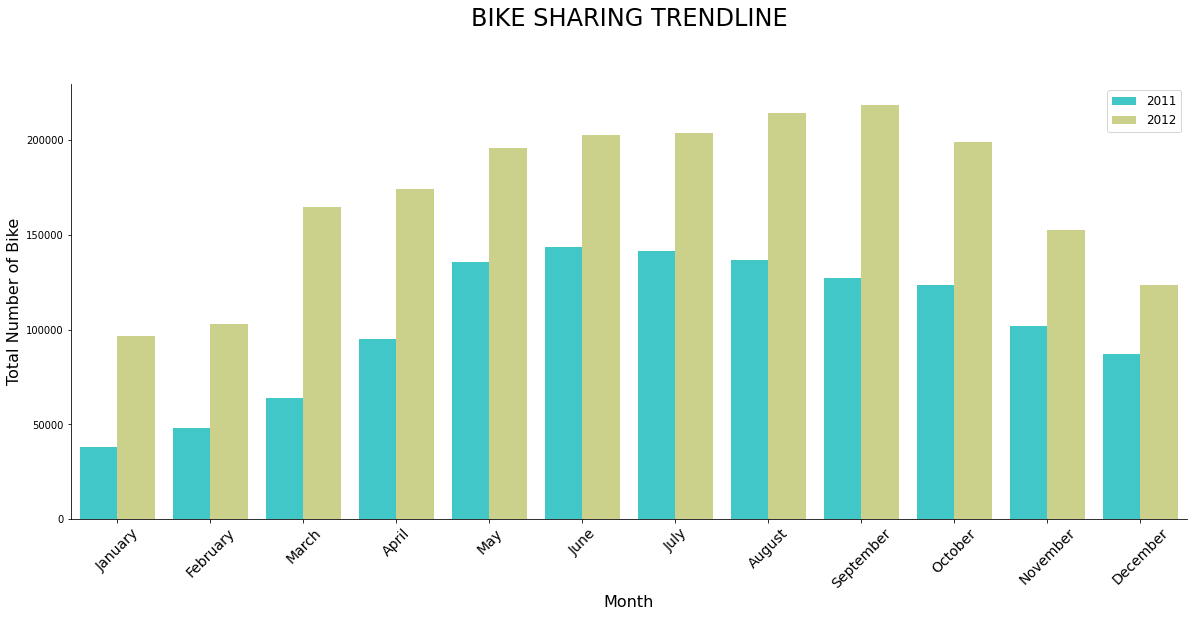

In [14]:
fig, ax = plt.subplots(figsize=(20,8))  
                                                        
sns.barplot(data = bike_sum_mth, x='month',y='count',hue='year',ci=None,palette='rainbow')          
sns.despine(top=True, right=True, left=False, bottom=False)                                     
plt.xlabel('Month', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(rotation=45, size=14)                                                                
plt.title('BIKE SHARING TRENDLINE', size=24, y=1.12)                                         
plt.legend(loc=0, prop={'size': 12})

plt.show()

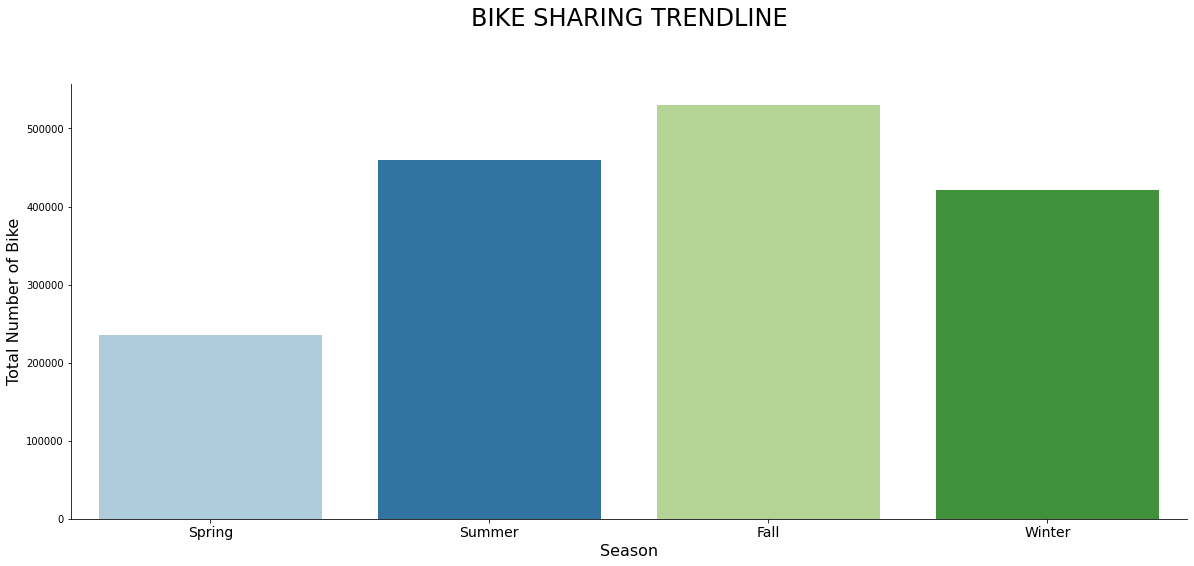

In [15]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = bike_season, x='season',y='count',ci=None,palette='Paired')   
sns.despine(top=True, right=True, left=False, bottom=False)                                                                     
plt.xlabel('Season', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(size=14)                                                                                                                           
plt.title('BIKE SHARING TRENDLINE', size=24, y=1.12)                                                                         

plt.show()

These plot shows us that bike sharing's sales are increasing from 2011 to 2012. This trend is similar on each years. We could see in the graph that in spring season (December, January and February) sales are being the smallest. We have assumption that these months has share same weather condition which affect the concern of people using bike as transportation.

### **DO WEATHER CONDITION AFFECT THE USAGE OF BIKE SHARING ?**

In [16]:
#sum bike rented based on weather condition

weather_effect = pd.DataFrame(bike.groupby(['weather_condition']).sum()[['casual','registered','count']]).reset_index()
weather_effect

,weather_condition,casual,registered,count
0,Clear,462745,1875428,2338173
1,Cloudy,134481,661471,795952
2,Heavy Rain,8,215,223
3,Light Rain,22783,135548,158331


In [17]:
#sum bike rented 

weather_effect_month = pd.DataFrame(bike.groupby(['month','weather_condition']).sum()[['casual','registered','count']]).reset_index()
weather_effect_month['month']=weather_effect_month['month'].astype(order_mth)
weather_effect_month['weather_condition']=weather_effect_month['weather_condition'].astype(order_weather)
weather_effect_month = weather_effect_month.sort_values(['month','weather_condition'])
weather_effect_month

,month,weather_condition,casual,registered,count
12,January,Clear,8843,83883,92726
13,January,Cloudy,2844,33790,36634
15,January,Light Rain,347,5003,5350
14,January,Heavy Rain,8,215,223
9,February,Clear,11196,94422,105618
10,February,Cloudy,3198,32216,35414
11,February,Light Rain,569,9751,10320
22,March,Clear,30077,126017,156094
23,March,Cloudy,12978,49924,62902
24,March,Light Rain,1389,8535,9924


In [49]:
#temp effect on total number of bike rented

temp_effect = pd.DataFrame(bike.groupby(['temp']).sum()[['casual','registered','count']]).reset_index()
temp_effect

,temp,casual,registered,count
0,0.82,16,696,712
1,1.64,28,542,570
2,2.46,44,628,672
3,3.28,33,447,480
4,4.10,85,2429,2514
5,4.92,169,4271,4440
6,5.74,336,7269,7605
7,6.56,802,14281,15083
8,7.38,513,8805,9318
9,8.20,1442,26788,28230


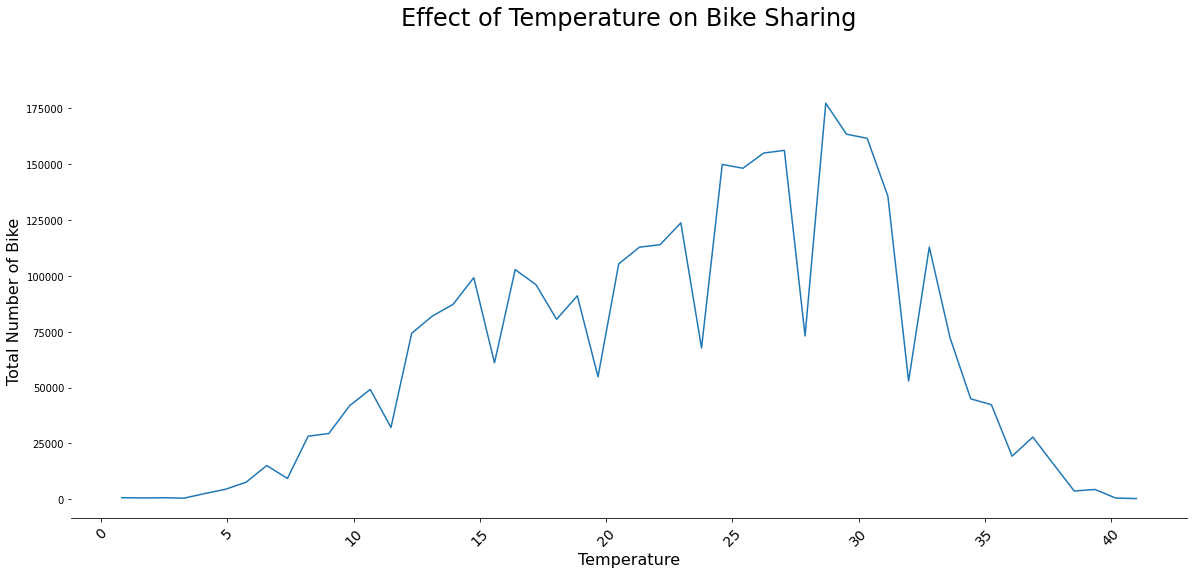

In [50]:
fig, ax = plt.subplots(figsize=(20,8))   
                                                      
sns.lineplot(data=temp_effect, x='temp', y='count')           
sns.despine(top=True, right=True, left=True, bottom=False)                                     
plt.xlabel('Temperature', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(rotation=45, size=14)                                                                
plt.title('Effect of Temperature on Bike Sharing', size=24, y=1.12)                                          

plt.show()

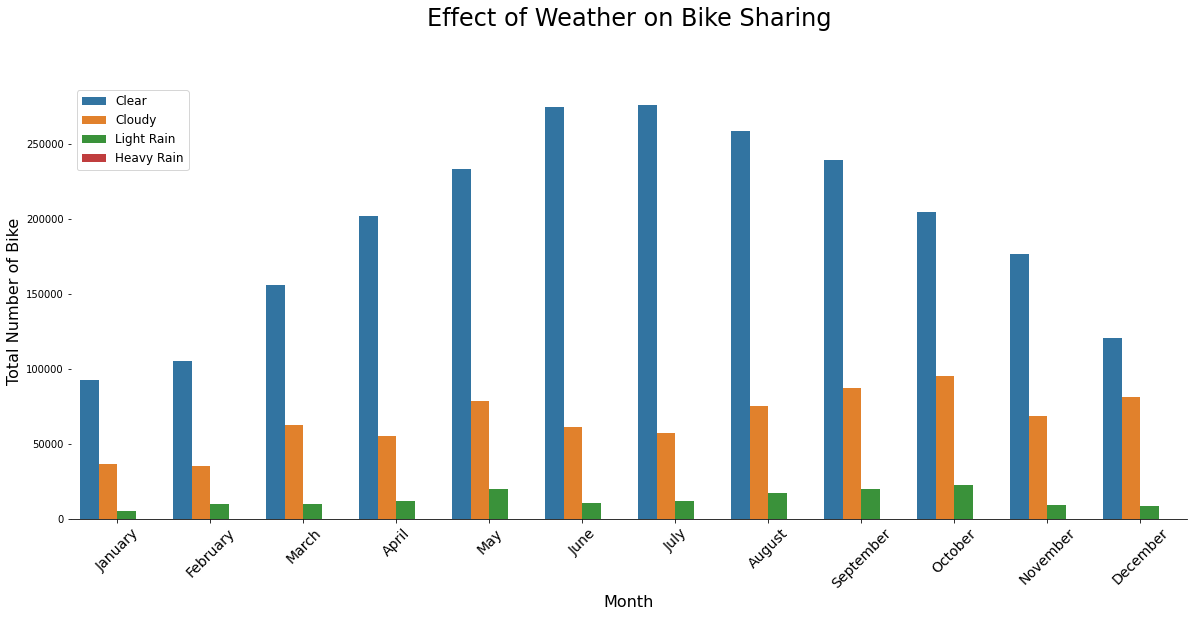

In [52]:
fig, ax = plt.subplots(figsize=(20,8))   
                                                      
sns.barplot(data=weather_effect_month, x='month', y='count', hue='weather_condition')           
sns.despine(top=True, right=True, left=True, bottom=False)                                     
plt.xlabel('Month', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(rotation=45, size=14)                                                                
plt.title('Effect of Weather on Bike Sharing', size=24, y=1.12)                                          
plt.legend(loc=0, prop={'size': 12})

plt.show()

From these evidence, we **conclude** that most of people will use bike when the condition outside is quite comfortable, because the increase of bike rented are occured while the weather condition is clear.

# **USER BEHAVIOUR**

In [21]:
#behaviour of user based on type of day

workingday_effect = pd.DataFrame(bike.groupby(['hr','is_workingday']).sum()[['casual','registered']]).reset_index()
workingday_effect

,hr,is_workingday,casual,registered
0,0,Weekend,3829,17055
1,0,Workingday,3546,14700
2,1,Weekend,2876,13111
3,1,Workingday,1833,6344
4,2,Weekend,2371,9752
5,2,Workingday,1041,3188
6,3,Weekend,1465,4386
7,3,Workingday,428,1895
8,4,Weekend,514,1362
9,4,Workingday,360,2192


In [22]:
#behaviour of user based on type of day

holiday_effect = pd.DataFrame(bike.groupby(['is_holiday','month','year']).sum()[['casual','registered']]).reset_index()
holiday_effect['month']=holiday_effect['month'].astype(order_mth)
holiday_effect = holiday_effect.sort_values(['year','month'])
holiday_effect

,is_holiday,month,year,casual,registered
8,No,January,2011,2956,34233
30,Yes,January,2011,117,883
6,No,February,2011,6047,41061
28,Yes,February,2011,195,912
14,No,March,2011,12826,51219
0,No,April,2011,21704,70040
24,Yes,April,2011,642,2484
16,No,May,2011,29501,102222
34,Yes,May,2011,1549,2549
12,No,June,2011,30612,112900


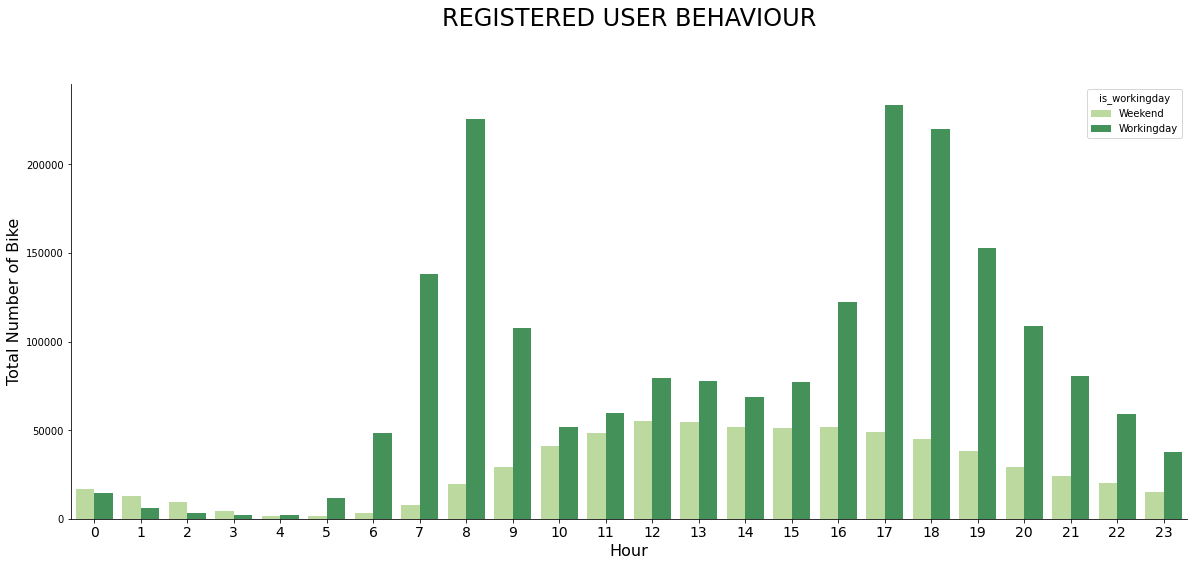

In [23]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = workingday_effect, x='hr',y='registered',hue='is_workingday',palette='YlGn')   
sns.despine(top=True, right=True, left=False, bottom=False)                                                                     
plt.xlabel('Hour', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(size=14)                                                                                                                           
plt.title('REGISTERED USER BEHAVIOUR', size=24, y=1.12)                                                                         

plt.show()

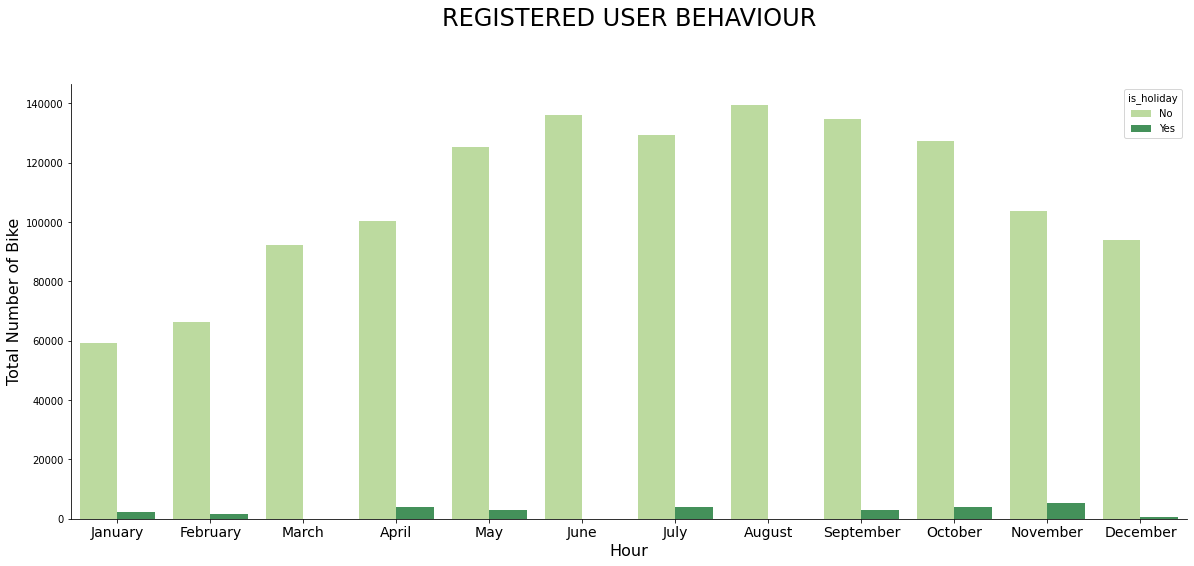

In [60]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = holiday_effect, x='month',y='registered',hue='is_holiday', palette='YlGn',ci= None)   
sns.despine(top=True, right=True, left=False, bottom=False)                                                                     
plt.xlabel('Hour', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(size=14)                                                                                                                           
plt.title('REGISTERED USER BEHAVIOUR', size=24, y=1.12)                                                                         

plt.show()

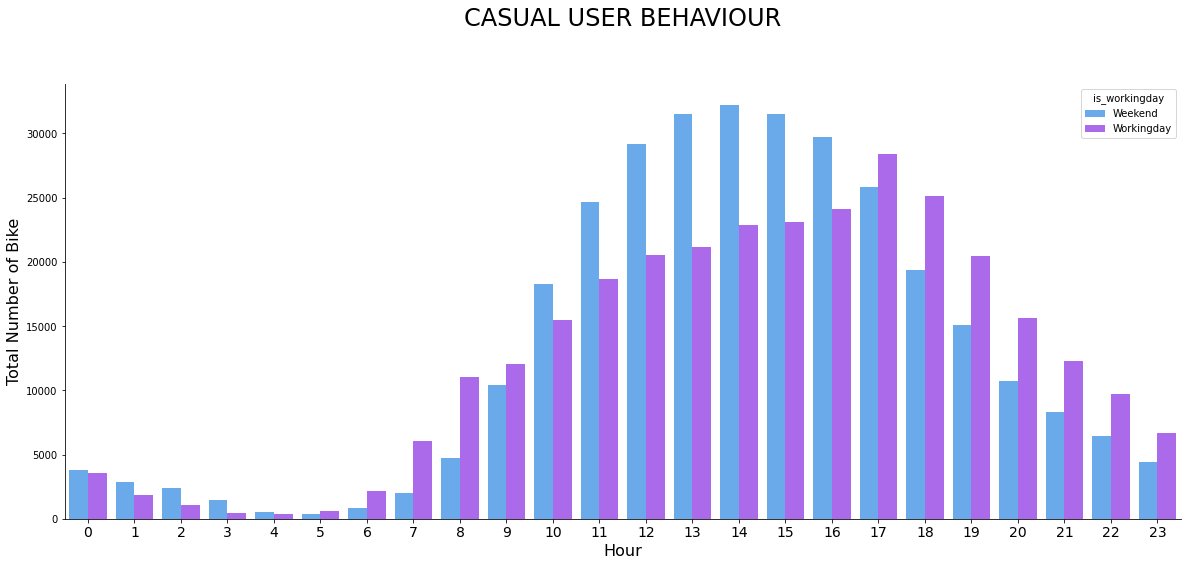

In [25]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = workingday_effect, x='hr',y='casual',hue='is_workingday', palette='cool')   
sns.despine(top=True, right=True, left=False, bottom=False)                                                                     
plt.xlabel('Hour', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(size=14)                                                                                                                           
plt.title('CASUAL USER BEHAVIOUR', size=24, y=1.12)                                                                         

plt.show()

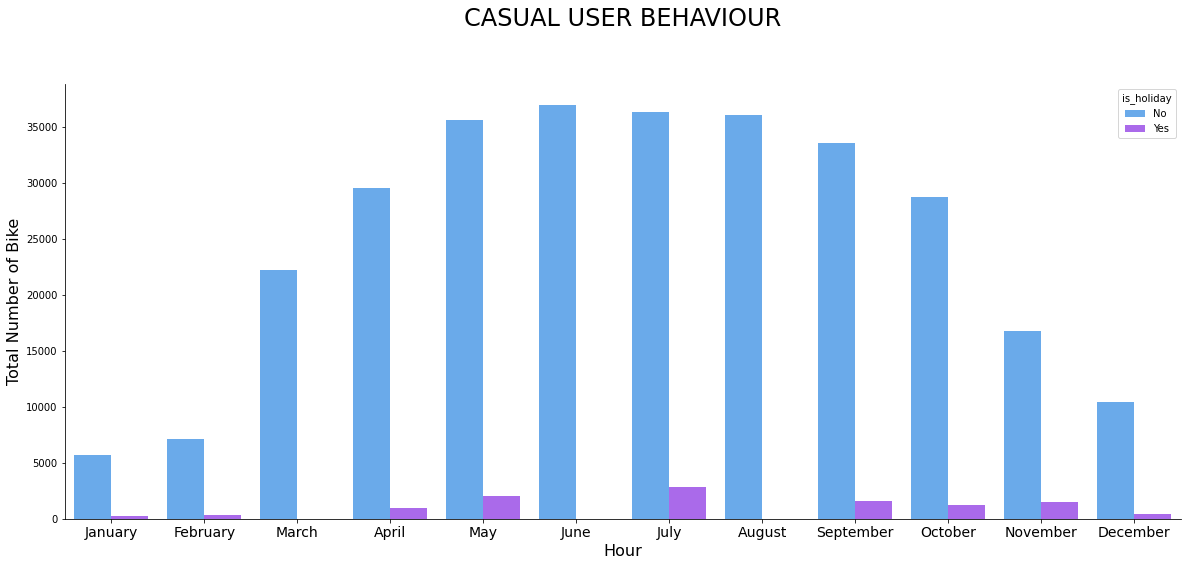

In [59]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = holiday_effect, x='month',y='casual',hue='is_holiday',palette='cool', ci=None)   
sns.despine(top=True, right=True, left=False, bottom=False)                                                                     
plt.xlabel('Hour', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(size=14)                                                                                                                           
plt.title('CASUAL USER BEHAVIOUR', size=24, y=1.12)                                                                         

plt.show()

These graphs show people ride less on holidays. And the number of holiday on 2011 and 2012 are only a few based on data extracted from dchr.dc.gov . Which means that holiday only will make a small effect on number of bike rented.

# **EXPLORE DATASET**

## **DISTRIBUTION DATA OF EACH NUMERICAL FEATURES**

###TEMP

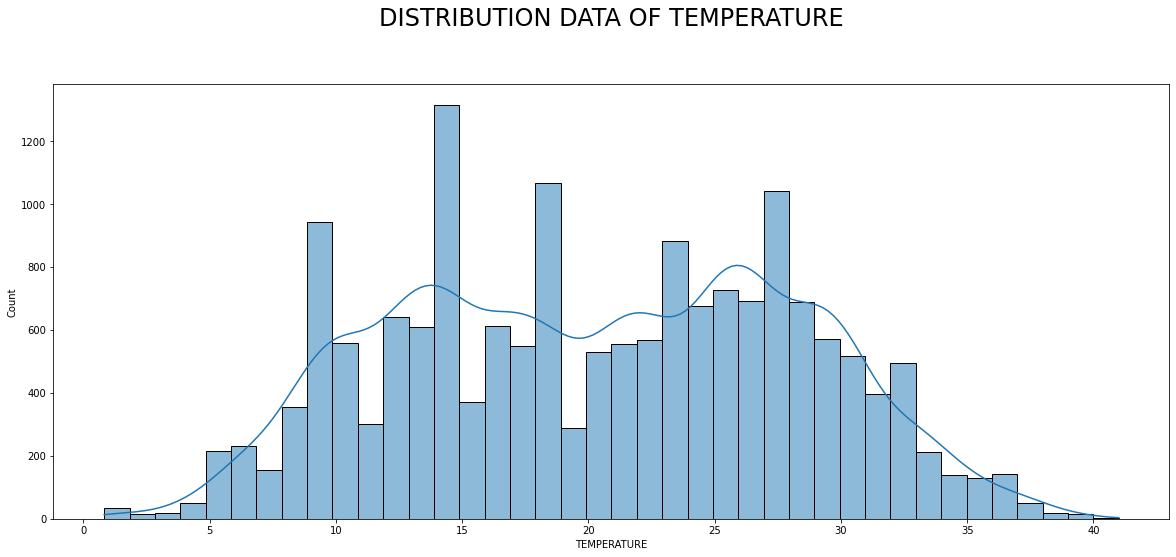

In [34]:
plt.figure(figsize=(20,8))
sns.histplot(bike['temp'], kde=True)
plt.xlabel('TEMPERATURE')
plt.title('DISTRIBUTION DATA OF TEMPERATURE', size=24, y=1.12)                                          
plt.show()

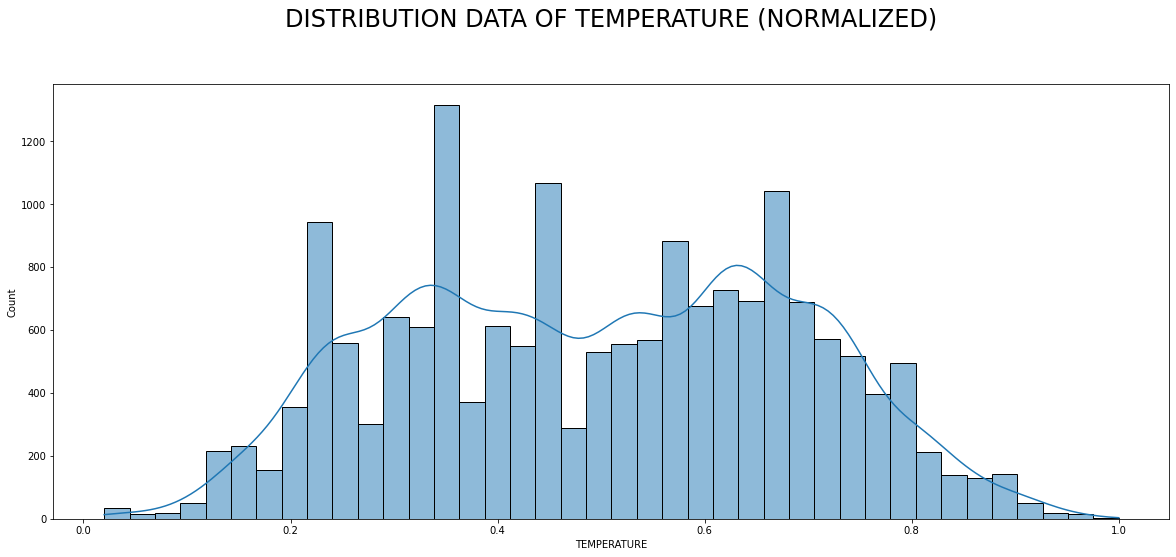

In [72]:
plt.figure(figsize=(20,8))
sns.histplot(df['temp'], kde=True)
plt.xlabel('TEMPERATURE')
plt.title('DISTRIBUTION DATA OF TEMPERATURE (NORMALIZED)', size=24, y=1.12)                                          
plt.show()

###ATEMP

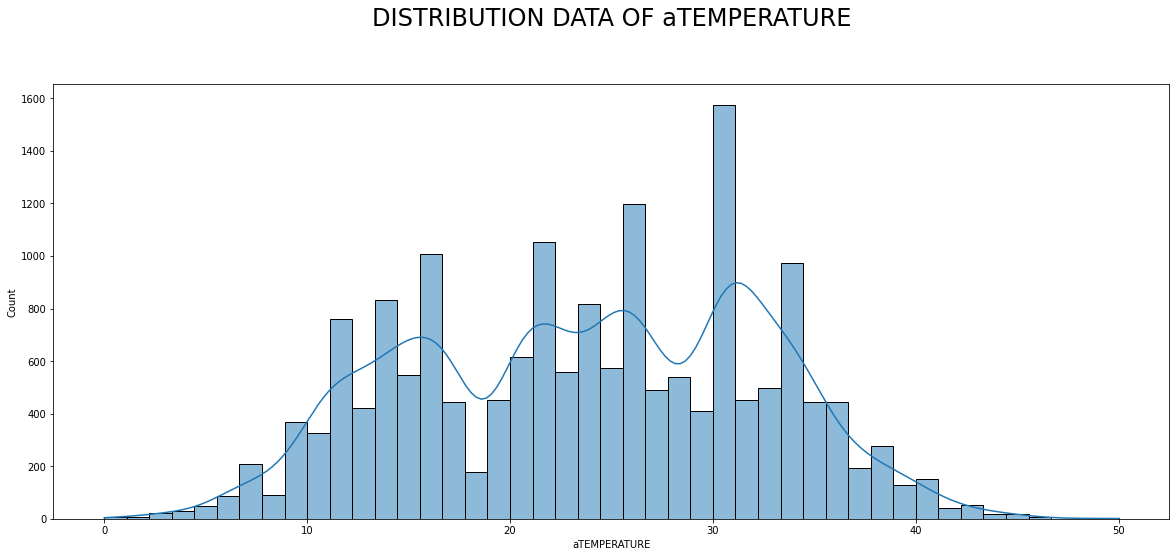

In [35]:
plt.figure(figsize=(20,8))
sns.histplot(bike['atemp'], kde=True)
plt.xlabel('aTEMPERATURE')
plt.title('DISTRIBUTION DATA OF aTEMPERATURE', size=24, y=1.12)                                          
plt.show()

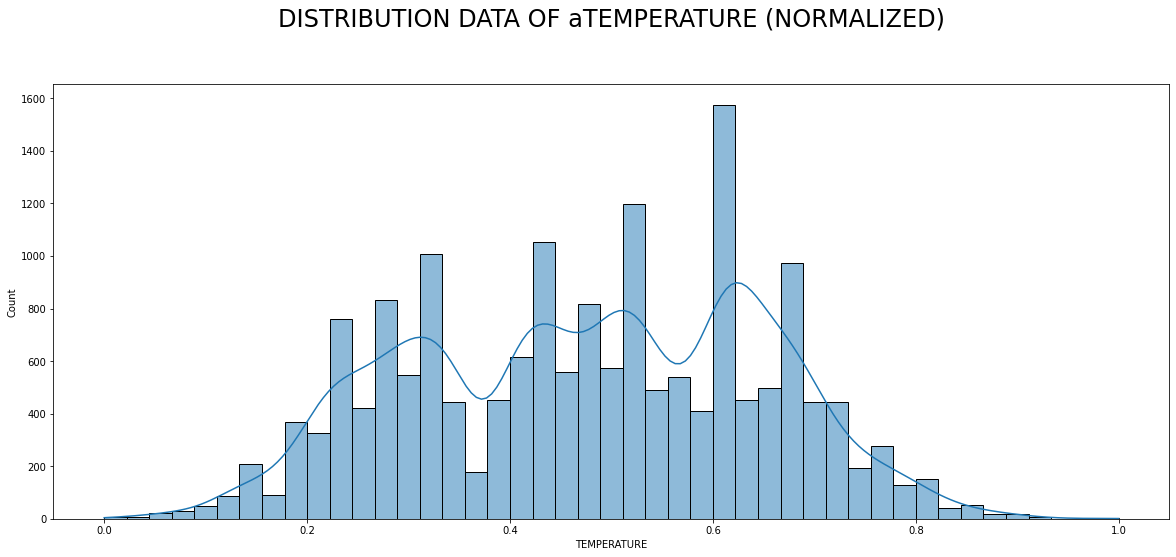

In [76]:
plt.figure(figsize=(20,8))
sns.histplot(df['atemp'], kde=True)
plt.xlabel('TEMPERATURE')
plt.title('DISTRIBUTION DATA OF aTEMPERATURE (NORMALIZED)', size=24, y=1.12)                                          
plt.show()

###HUMIDITY

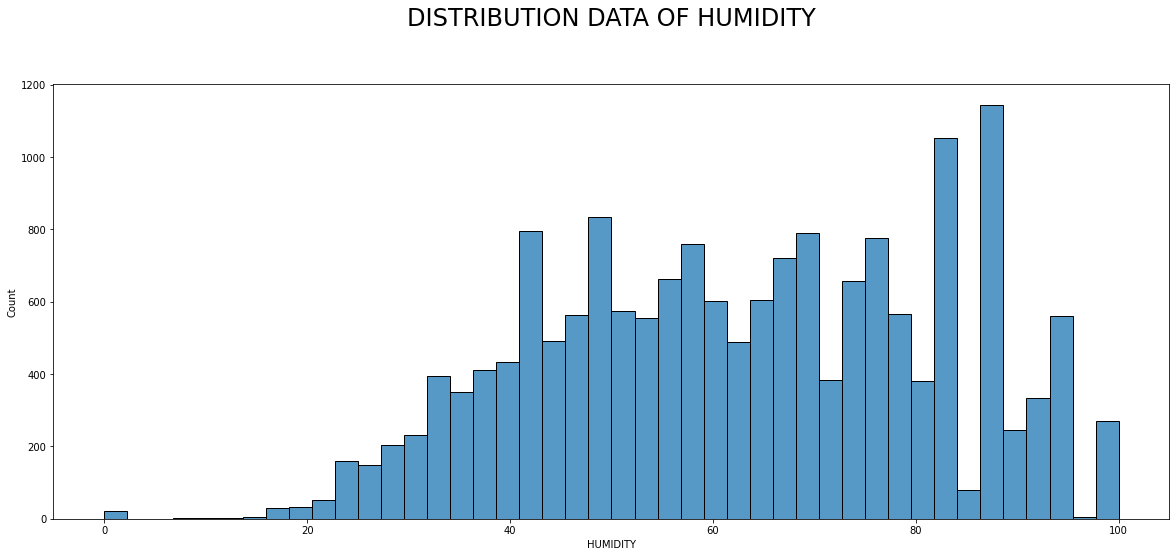

In [36]:
plt.figure(figsize=(20,8))
sns.histplot(bike['humidity'])
plt.xlabel('HUMIDITY')
plt.title('DISTRIBUTION DATA OF HUMIDITY', size=24, y=1.12)                                          
plt.show()

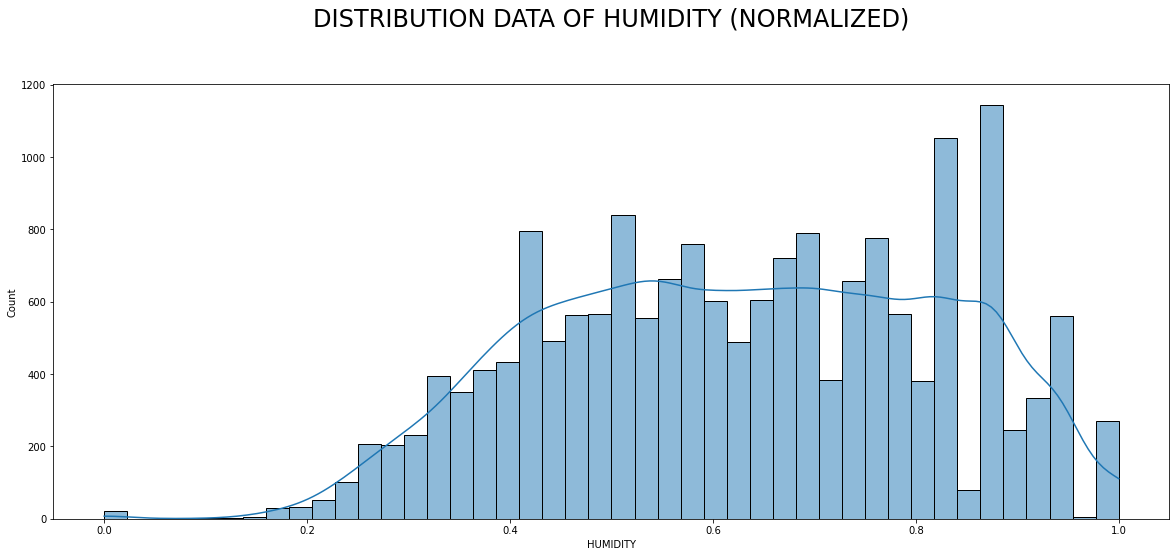

In [75]:
plt.figure(figsize=(20,8))
sns.histplot(df['hum'], kde=True)
plt.xlabel('HUMIDITY')
plt.title('DISTRIBUTION DATA OF HUMIDITY (NORMALIZED)', size=24, y=1.12)                                          
plt.show()

###WINDSPEED

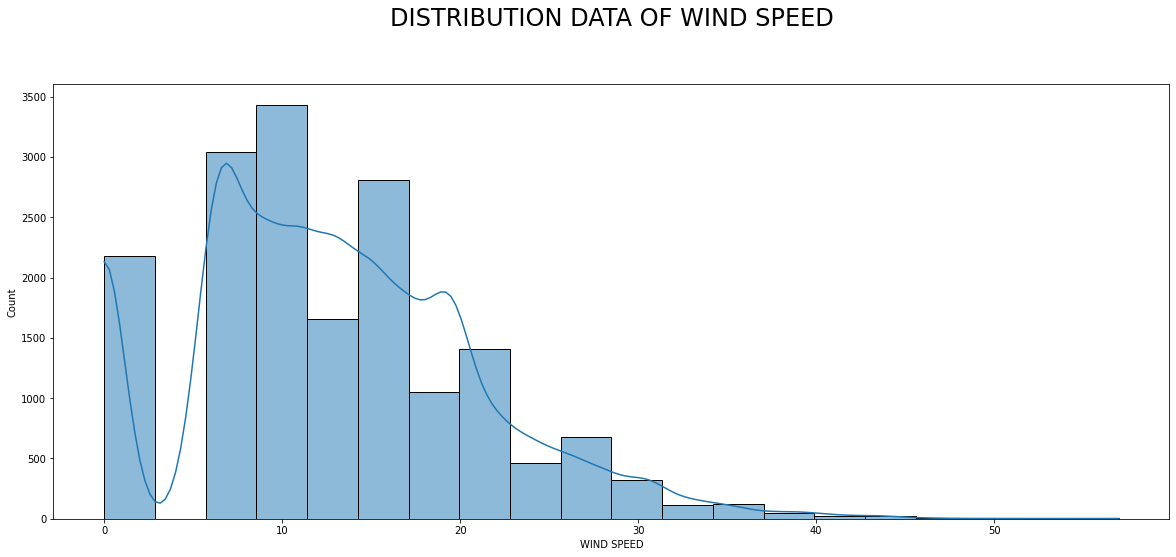

In [37]:
plt.figure(figsize=(20,8))
sns.histplot(bike['windspeed'], bins=20, kde=True)
plt.xlabel('WIND SPEED')
plt.title('DISTRIBUTION DATA OF WIND SPEED', size=24, y=1.12)                                          
plt.show()

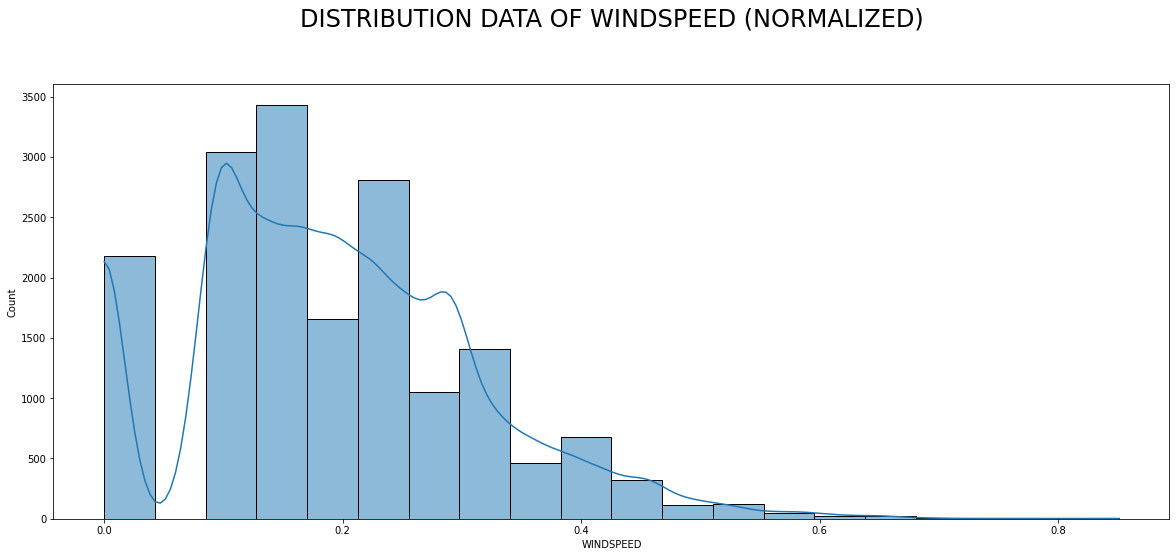

In [77]:
plt.figure(figsize=(20,8))
sns.histplot(df['windspeed'], bins=20, kde=True)
plt.xlabel('WINDSPEED')
plt.title('DISTRIBUTION DATA OF WINDSPEED (NORMALIZED)', size=24, y=1.12)                                          
plt.show()

###CASUAL

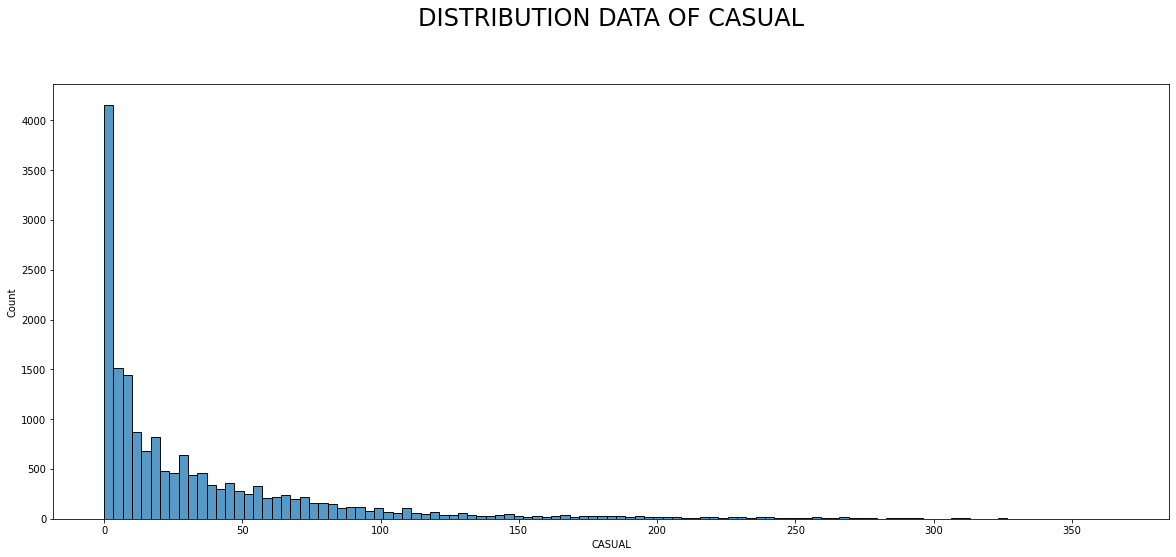

In [38]:
plt.figure(figsize=(20,8))
sns.histplot(bike['casual'])
plt.xlabel('CASUAL')
plt.title('DISTRIBUTION DATA OF CASUAL', size=24, y=1.12)                                          
plt.show()

###REGISTERED

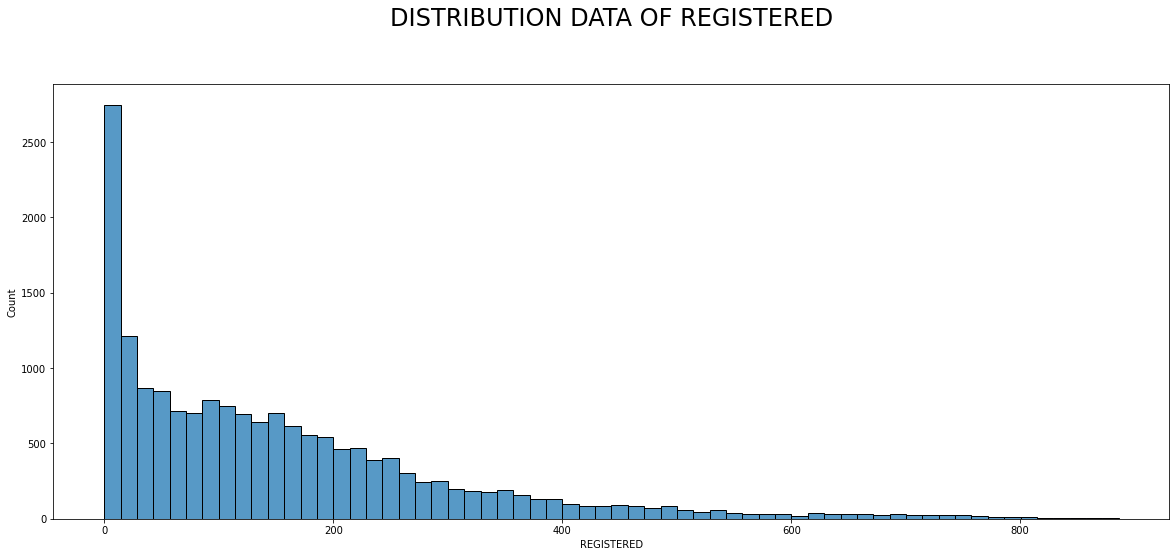

In [39]:
plt.figure(figsize=(20,8))
sns.histplot(bike['registered'])
plt.xlabel('REGISTERED')
plt.title('DISTRIBUTION DATA OF REGISTERED', size=24, y=1.12)                                          
plt.show()

###COUNT

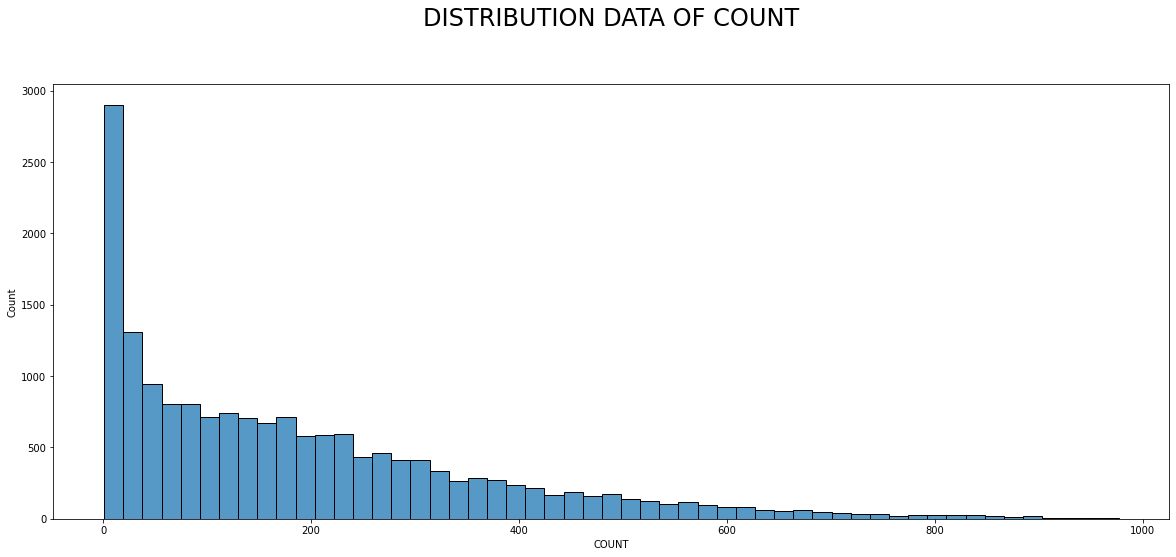

In [40]:
plt.figure(figsize=(20,8))
sns.histplot(bike['count'])
plt.xlabel('COUNT')
plt.title('DISTRIBUTION DATA OF COUNT', size=24, y=1.12)                                          
plt.show()

### **CORRELATION MATRIX**

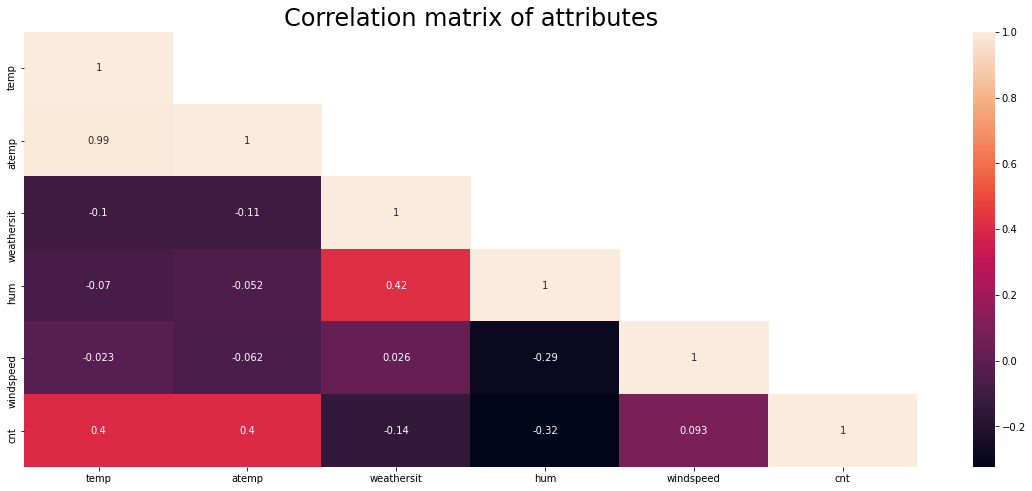

In [41]:
correMtr=df[['temp','atemp','weathersit','hum','windspeed','cnt']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(correMtr,mask=mask,annot=True)
ax.set_title('Correlation matrix of attributes', size=24, y=1.12)
plt.show()

Based on EDA and Correlation Matrix we can conclude that: <br>

1.   The seasonal effect is too high in bike usage and also, there are different demand levels among the months in the same season. That’s why, both season and month should be used as inputs in the model.
2.   The summation of bike usage in 2012 is higher than 2011 which means that both the number of users and de-mand of the system increased by time, so the year attribute should also be used as input in the model.
3. The bike usage is at maximum especially in rush hours. By looking at the relationship between cnt and hr closer, it can be seen that the hours 7, 8, 9, 17, 18, 19, and 20 have different characteristics in working days.
4. As for the weather condition, temperature, humidity and windspeed will be use also as input in the model because in correlation matrix they showed a significant contribution.
5. We do not use atemp because the correlation with the temp is almost one, which if we use atemp it would cause multicollinearity to temp.
6. We do not use casual and registered because the main problem here is to predict the whole number of bike instead of clustering how many bike rented by casual user and registered user





In [43]:
data = bike[['season', 'year', 'month','day', 'hr', 'is_holiday',
             'is_workingday', 'weather_condition', 'temp','humidity',
             'windspeed','count']]

In [78]:
data.to_csv(r'/content/drive/MyDrive/Data Science and Machine Learning/Project/Bike_Sharing/Dataset/bike.csv', index = False, header=True)